## Assignment 3

#### Charvi Upreti

charvi.upreti2021@vitstudent.ac.in

21BCE1440




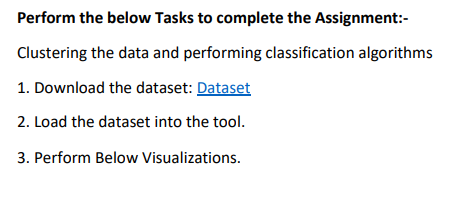

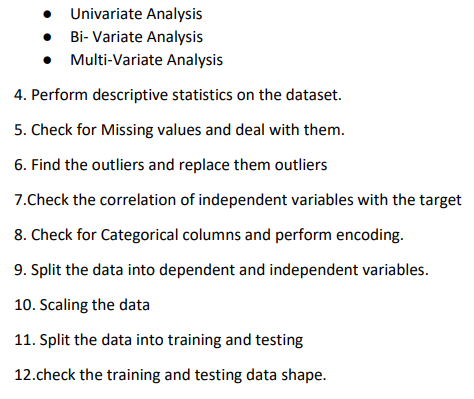

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

#### Task 1 and 2: Dataset was Downloaded and then loaded
link of dataset: https://drive.google.com/file/d/1AvRp8hOK-O76WIFvPj_rk10fAZbt8nWH/view

In [2]:
df=pd.read_csv("C:/Users/Charvi Upreti/Desktop/Assignments/Assignment 3/penguins_size.csv")

Basic information

In [3]:
df.head().T

,0,1,2,3,4
species,Adelie,Adelie,Adelie,Adelie,Adelie
island,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen
culmen_length_mm,39.1,39.5,40.3,NaN,36.7
culmen_depth_mm,18.7,17.4,18.0,NaN,19.3
flipper_length_mm,181.0,186.0,195.0,NaN,193.0
body_mass_g,3750.0,3800.0,3250.0,NaN,3450.0
sex,MALE,FEMALE,FEMALE,NaN,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

#### Task 3: Visualizations on initial dataset:-

**Visualizations are continued after dealing with missing values

In [6]:
rcParams['figure.figsize']=5,5

Univariate Analysis

C:\Users\Charvi Upreti\AppData\Local\Temp\ipykernel_25624\2265130548.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_length_mm)


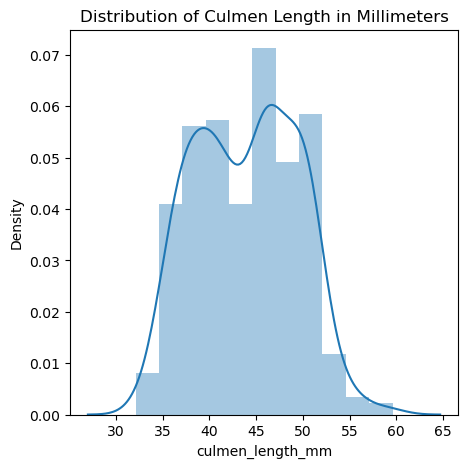

In [7]:
#distribution of culmen_length
sns.distplot(df.culmen_length_mm)
plt.title('Distribution of Culmen Length in Millimeters')
plt.show()

C:\Users\Charvi Upreti\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


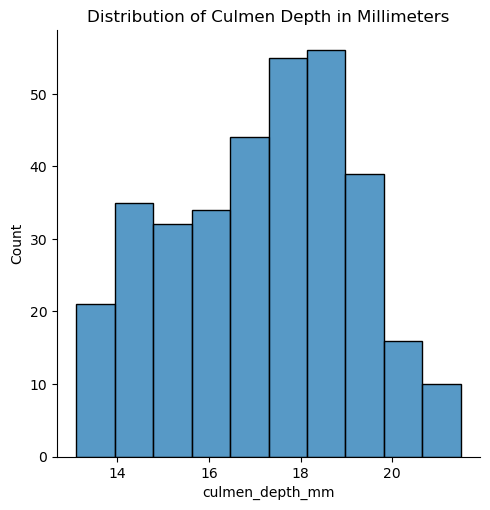

In [8]:
#distribution of culmen_depth
sns.displot(df.culmen_depth_mm)
plt.title('Distribution of Culmen Depth in Millimeters')
plt.show()

In [9]:
df['flipper_length_mm'].nunique()

55

In [10]:
list1=list(df['flipper_length_mm'].value_counts())

In [11]:
rcParams['figure.figsize']=15,15

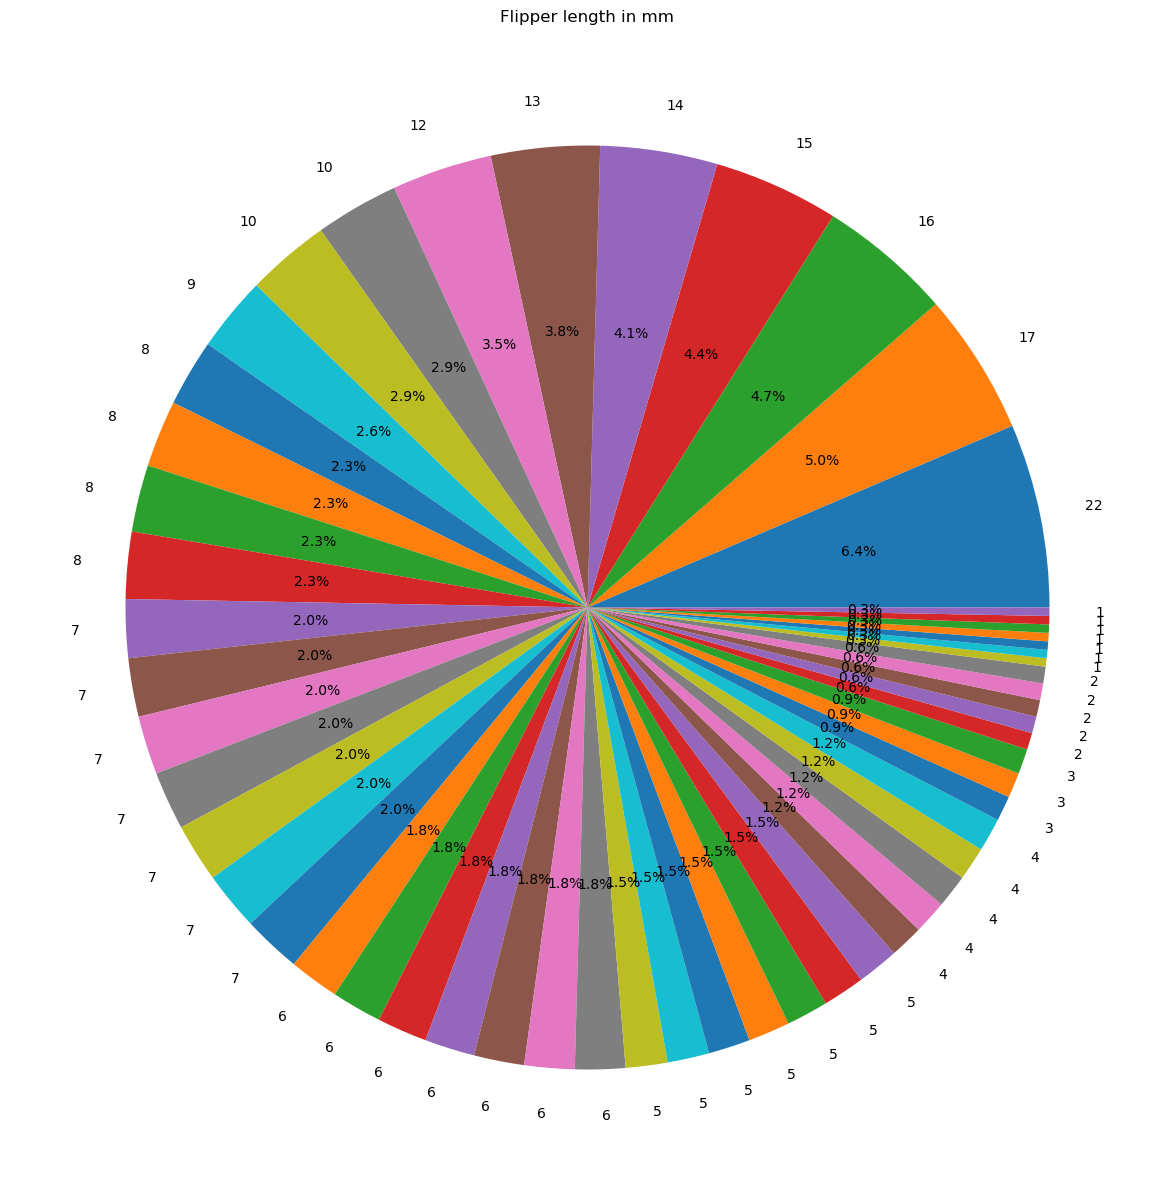

In [12]:
plt.pie(df.flipper_length_mm.value_counts(),labels = list1,autopct ='%1.1f%%',)
plt.title('Flipper length in mm')
plt.show()

In [13]:
rcParams['figure.figsize']=5,5

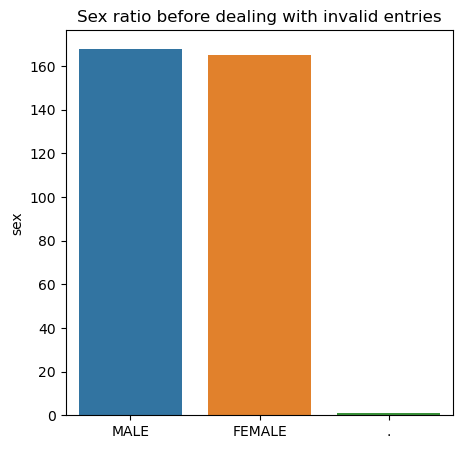

In [14]:
sns.barplot(x =df.sex.value_counts().index,y =df.sex.value_counts())
plt.title('Sex ratio before dealing with invalid entries')
# Done again after dealing with them later.
plt.show()

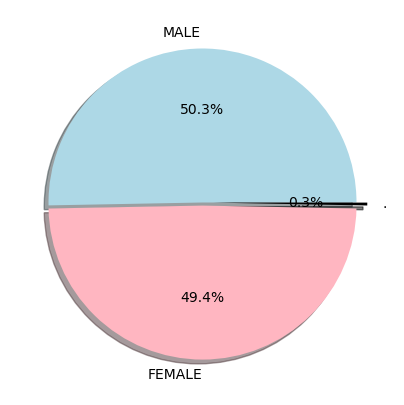

In [15]:
counts = df['sex'].value_counts()
plt.figure()
plt.pie(counts, [0,0.02,0.07],shadow=True,labels=counts.index, autopct='%1.1f%%',colors=["lightblue","lightpink","black"])
plt.show()

Bi - Variate Analysis

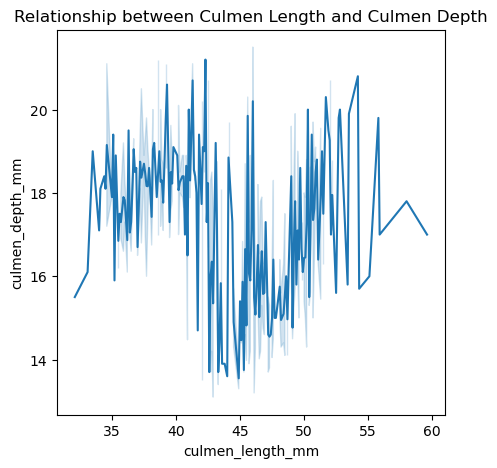

In [16]:
sns.lineplot(x = df.culmen_length_mm,y=df.culmen_depth_mm)
plt.title('Relationship between Culmen Length and Culmen Depth')
plt.show()

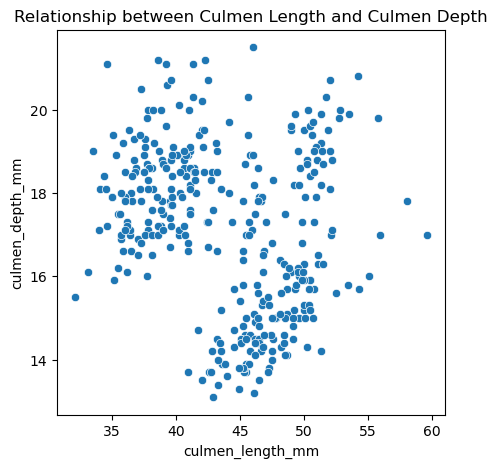

In [17]:
sns.scatterplot(x = df.culmen_length_mm,y=df.culmen_depth_mm)
plt.title('Relationship between Culmen Length and Culmen Depth')
plt.show()

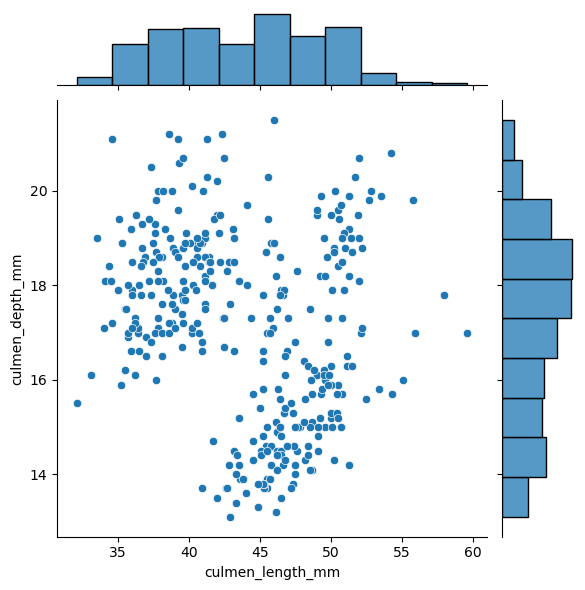

In [18]:
sns.jointplot(x = df.culmen_length_mm,y=df.culmen_depth_mm)
plt.show()

Multi-Variate Analysis

C:\Users\Charvi Upreti\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


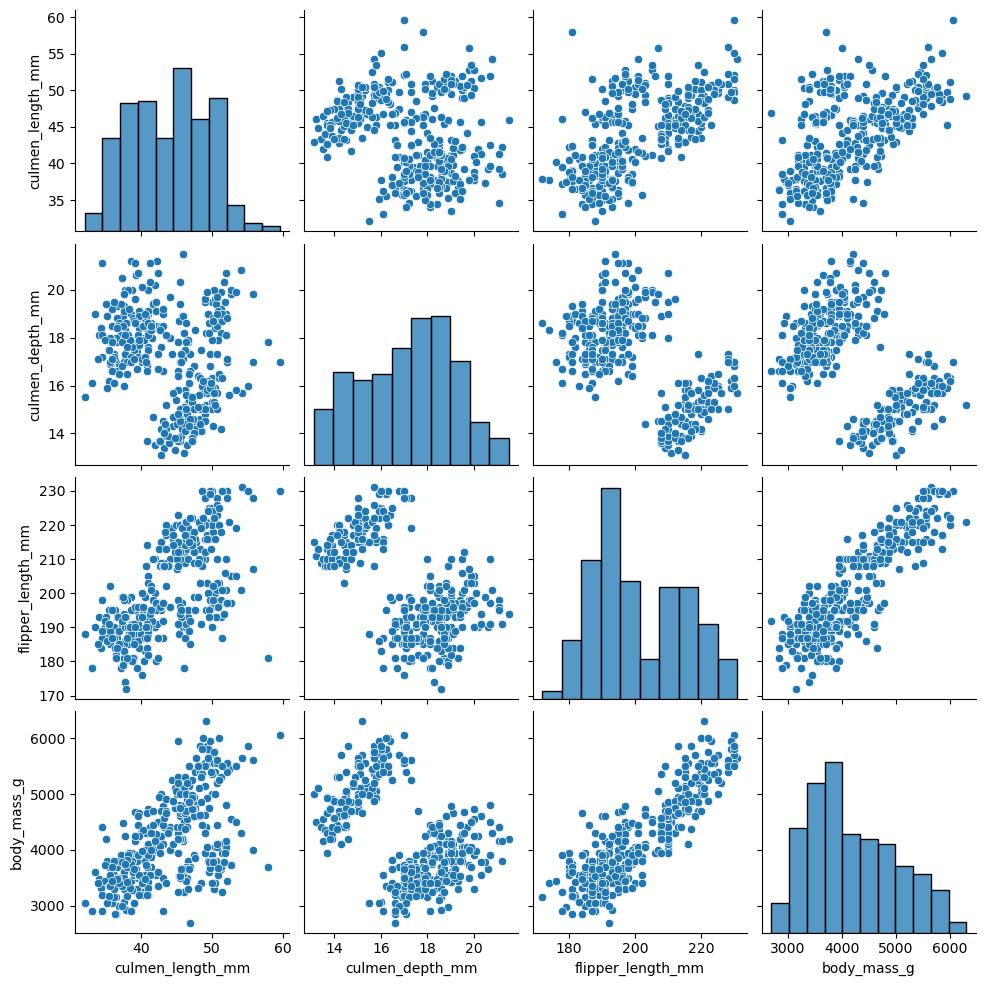

In [19]:
sns.pairplot(df)
plt.show()

<Axes: >

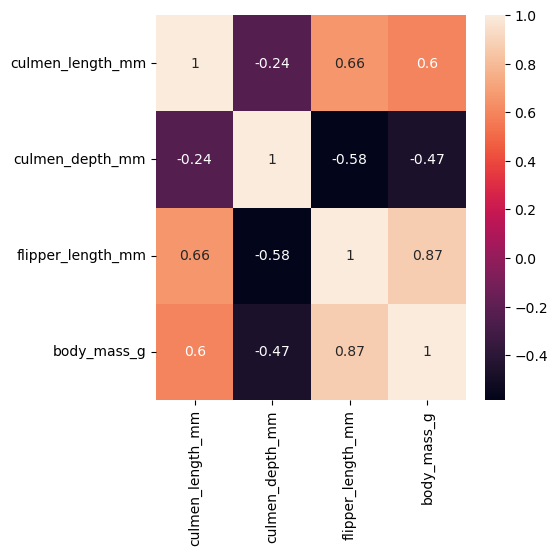

In [20]:
sns.heatmap(df.corr(),annot=True)

#### Task 4: Descriptive statistice on the dataset

In [21]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#### Task 5: Checking missing values and dealing with them

In [22]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [23]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [24]:
df['sex'] = df['sex'].replace(".", df['sex'].mode()[0])

In [25]:
df.sex.value_counts()

MALE      169
FEMALE    165
Name: sex, dtype: int64

In [26]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [27]:
df.sex.value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [28]:
df=df.fillna(df.median())

C:\Users\Charvi Upreti\AppData\Local\Temp\ipykernel_25624\308181716.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.median())


In [29]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


#### Task 3 (Continued): Some visualizations done after dealing with missing / invalid values

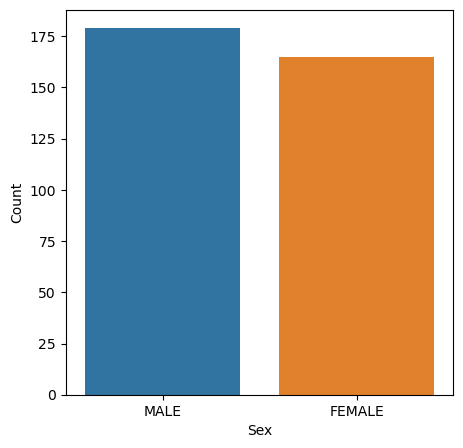

In [31]:
sns.barplot(x =df.sex.value_counts().index,y =df.sex.value_counts())
# Done after dealing with invalid/missing entries.
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

C:\Users\Charvi Upreti\AppData\Local\Temp\ipykernel_25624\1383932245.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_length_mm)


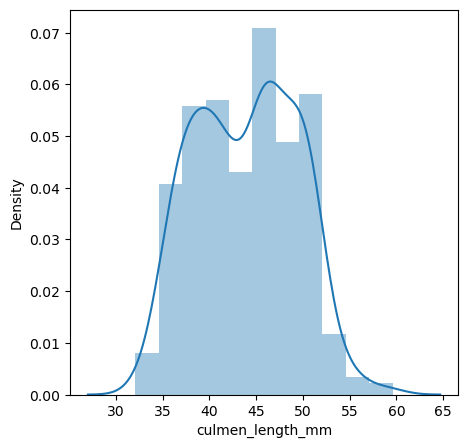

In [32]:
sns.distplot(df.culmen_length_mm)
plt.show()

Univariate

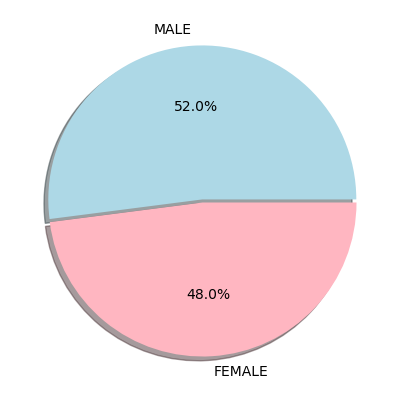

In [33]:
counts = df['sex'].value_counts()
plt.figure()
plt.pie(counts, [0.02,0],shadow=True,labels=counts.index, autopct='%1.1f%%',colors=["lightblue","lightpink"])
plt.show()

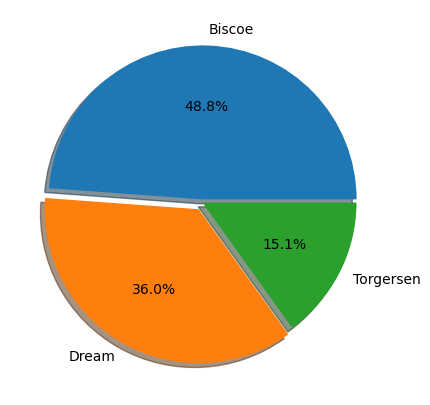

In [34]:
counts = df['island'].value_counts()
plt.figure()
plt.pie(counts, [0.02,0.05,0],shadow=True,labels=counts.index, autopct='%1.1f%%')
plt.show()

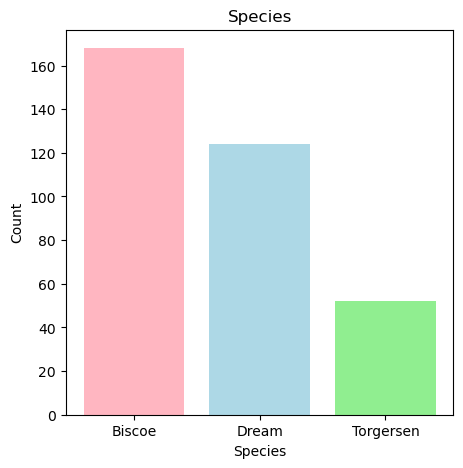

In [35]:
plt.bar(counts.index, counts, color=['lightpink', 'lightblue', 'lightgreen'])
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species')
plt.show()

Bi - Variate Analysis

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

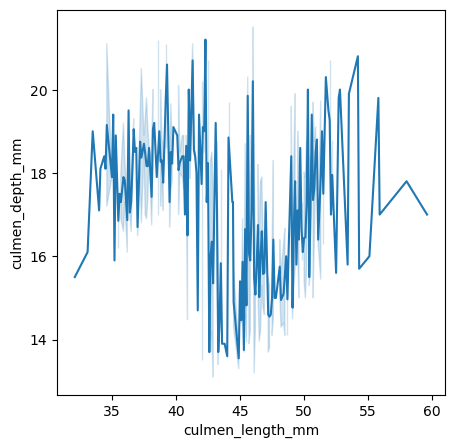

In [36]:
sns.lineplot(x = df.culmen_length_mm,y=df.culmen_depth_mm)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

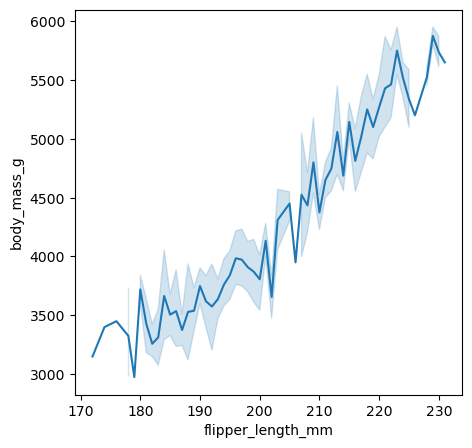

In [37]:
sns.lineplot(x = df.flipper_length_mm,y=df.body_mass_g)

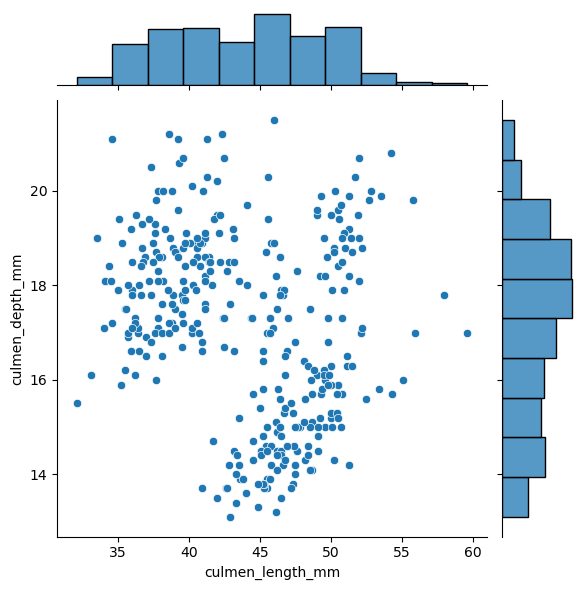

In [38]:
sns.jointplot(x = df.culmen_length_mm,y=df.culmen_depth_mm)

Multi-Variate Analysis

<Axes: >

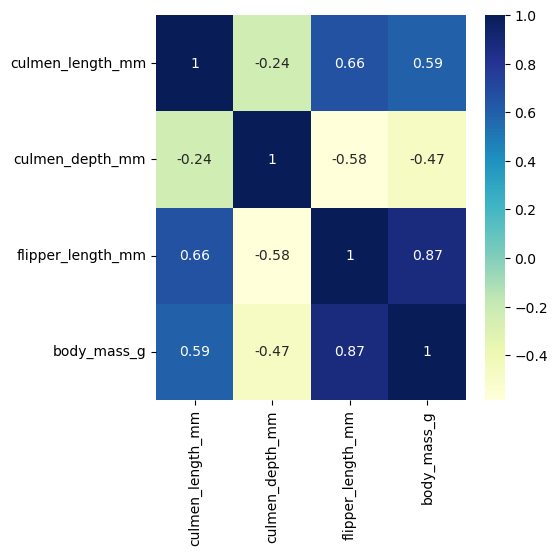

In [39]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

#### Task 6: Finding and replacing outliers

<Axes: >

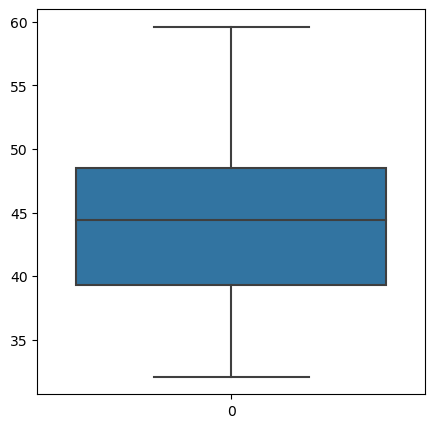

In [40]:
sns.boxplot(df.culmen_length_mm)
#### seems like no outliers

<Axes: >

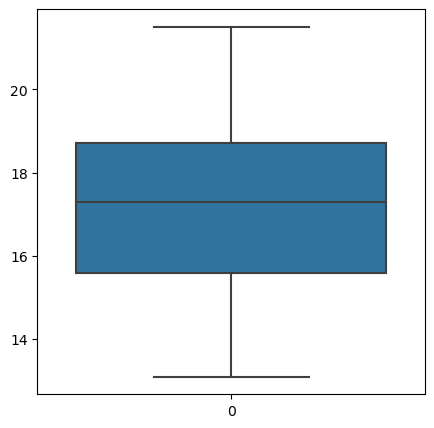

In [41]:
sns.boxplot(df.culmen_depth_mm)
#### seems like no outliers

<Axes: >

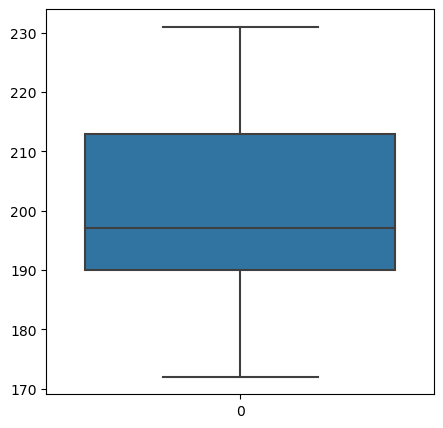

In [42]:
sns.boxplot(df.flipper_length_mm)
#### seems like no outliers

#### Outliers not present, but trying removal on culmen_length_mm by replacement with median

Before: 
39.275
48.5


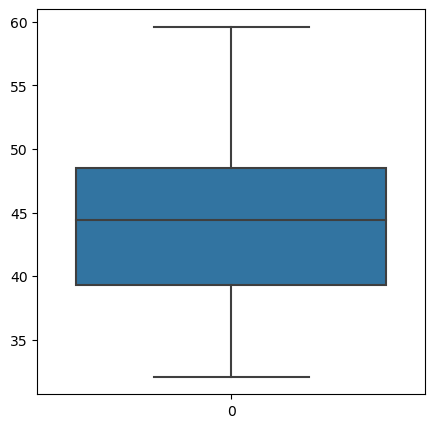

After: 
39.275
48.5
No change as no outliers present.


In [43]:
q1 = df.culmen_length_mm.quantile(0.25)
q3 = df.culmen_length_mm.quantile(0.75)
print("Before: ")
print(q1)
print(q3)
IQR = q3-q1
upper_limit = q3+1.5*IQR
df['culmen_length_mm'] = np.where(df['culmen_length_mm']>upper_limit,30,df['culmen_length_mm'])
sns.boxplot(df['culmen_length_mm'])
plt.show()
q1 = df.culmen_length_mm.quantile(0.25) #Q1
q3 = df.culmen_length_mm.quantile(0.75) #Q3
print("After: ")
print(q1)
print(q3)
print("No change as no outliers present.")

#### Task 8: Checking for categorical columns and performing encoding.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['island']=le.fit_transform(df['island'])
df['sex']=le.fit_transform(df['sex'])
#Species is target variable hence we did not encode it

#### Task 7: Checking correlation of independent variables with the target

In [46]:
df.corr()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
island,1.000000,-0.351189,0.567701,-0.562957,-0.558500,0.002893
culmen_length_mm,-0.351189,1.000000,-0.235000,0.655858,0.594925,0.322871
culmen_depth_mm,0.567701,-0.235000,1.000000,-0.583832,-0.471942,0.354791
flipper_length_mm,-0.562957,0.655858,-0.583832,1.000000,0.871221,0.241941
body_mass_g,-0.558500,0.594925,-0.471942,0.871221,1.000000,0.407107
sex,0.002893,0.322871,0.354791,0.241941,0.407107,1.000000


To check correlation creating a label encoded copy.

In [47]:
df_copy = df.copy()
df_copy['species'] = le.fit_transform(df_copy['species'])
df_copy.corr().species.sort_values(ascending =False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                  0.010240
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

#### Task 9: Spliting data to dependent and independent variables

In [48]:
Y=df['species']
Y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [49]:
X =df.drop(columns =['species'],axis =1)
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0


#### Task 10: Scaling the data

In [50]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


#### Task 11:Split the data into training and testing

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.3,random_state=25)

#### Task 12:Check the training and testing data shape

In [52]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(240, 6)
(240,)
(104, 6)
(104,)
